# Reporte de calidad de datasets - Organización X

Se importan las librerías a utilizar en el reporte


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set(palette= 'dark')

Se ingestan las tablas para su revisión

In [35]:
cliente = pd.read_csv(r'C:\Users\Willy\Desktop\Ale\HENRY\P_I\DS-PI-ProyectoIndividual\Datasets\Clientes.csv', encoding ='ansi',sep =';')
compra = pd.read_csv(r'C:\Users\Willy\Desktop\Ale\HENRY\P_I\DS-PI-ProyectoIndividual\Datasets\Compra.csv')
gasto = pd.read_csv(r'C:\Users\Willy\Desktop\Ale\HENRY\P_I\DS-PI-ProyectoIndividual\Datasets\Gasto.csv')
localidad = pd.read_csv(r'C:\Users\Willy\Desktop\Ale\HENRY\P_I\DS-PI-ProyectoIndividual\Datasets\Localidades.csv')
proveedor = pd.read_csv(r'C:\Users\Willy\Desktop\Ale\HENRY\P_I\DS-PI-ProyectoIndividual\Datasets\Proveedores.csv', encoding='latin1')
sucursal = pd.read_csv(r'C:\Users\Willy\Desktop\Ale\HENRY\P_I\DS-PI-ProyectoIndividual\Datasets\Sucursales.csv', sep=';')
venta = pd.read_csv(r'C:\Users\Willy\Desktop\Ale\HENRY\P_I\DS-PI-ProyectoIndividual\Datasets\Venta.csv')

In [36]:
sucursal = pd.read_csv(r'C:\Users\Willy\Desktop\Ale\HENRY\P_I\DS-PI-ProyectoIndividual\Datasets\Sucursales.csv', sep=';')

# FACTS TABLES

# Compra.csv

#### Valores faltantes

In [37]:
compra.isna().sum()

IdCompra           0
Fecha              0
Fecha_Año          0
Fecha_Mes          0
Fecha_Periodo      0
IdProducto         0
Cantidad           0
Precio           367
IdProveedor        0
dtype: int64

In [38]:
porcentaje_compra =round( 100*compra.Precio.isna().sum()/len(compra),4)
print('El porcentaje de valores faltantes es de: ', porcentaje_compra,'%')

El porcentaje de valores faltantes es de:  3.1805 %


#### Outliers

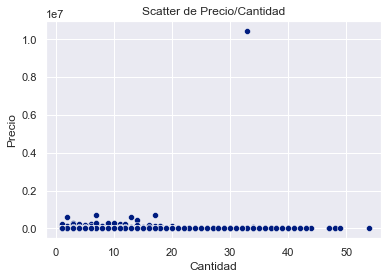

In [39]:
sns.scatterplot(x=compra.Cantidad, y=compra.Precio, palette='dark')
plt.xlim(right=56)
plt.title('Scatter de Precio/Cantidad')
plt.show()

Considerando outlier de la columna __PRECIO__ a cualquier valor que esté por debajo del percentil q=0.05 y por encima del perecentil q=0.95

In [40]:
cantidad_outliers = compra[compra['Precio']>compra.Precio.quantile(q=0.95)].count()[0] + compra[compra['Precio']<compra.Precio.quantile(q=0.05)].count()[0]
print('El porcentaje de Outliers de Precio es de:',round(100*cantidad_outliers/len(compra.Precio),2),'%')

El porcentaje de Outliers de Precio es de: 9.69 %


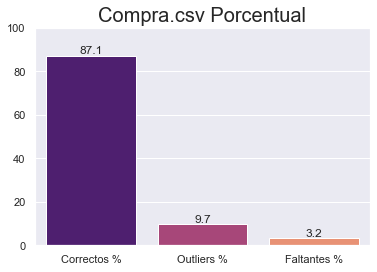

In [41]:
Outliers = cantidad_outliers
Faltantes = compra.isna().sum().sum()
Correctos = len(compra) - Outliers - Faltantes
x = ['Correctos %','Outliers %', 'Faltantes %']
y = [100*round(Correctos/len(compra),3),100* round(Outliers/len(compra),3), 100*round(Faltantes/len(compra),3)]

ax = sns.barplot(x=x, y=y, palette='magma')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Compra.csv Porcentual', fontsize=20)
plt.ylim(top=100)
plt.show()

# Gasto.csv

In [42]:
gasto.isna().sum()

IdGasto        0
IdSucursal     0
IdTipoGasto    0
Fecha          0
Monto          0
dtype: int64

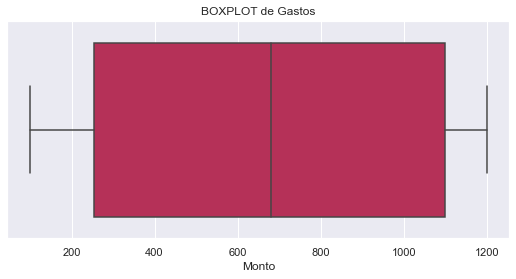

In [43]:
plt.subplots(figsize=(9,4))
sns.boxplot(x=gasto.Monto, palette= 'rocket')
plt.title('BOXPLOT de Gastos')
plt.show()

Se concluye que no hay outliers ni valores faltantes

# Ventas.csv

In [44]:
venta.head(1)


,IdVenta,Fecha,Fecha_Entrega,IdCanal,IdCliente,IdSucursal,IdEmpleado,IdProducto,Precio,Cantidad
0,1,2018-03-09,2018-03-17,3,969,13,1674,42817,813.12,2.0


#### Valores faltantes

In [45]:
venta.isna().sum()

IdVenta            0
Fecha              0
Fecha_Entrega      0
IdCanal            0
IdCliente          0
IdSucursal         0
IdEmpleado         0
IdProducto         0
Precio           924
Cantidad         892
dtype: int64

In [46]:
porcentaje_venta =round( 100*venta.Precio.isna().sum()/len(venta.Precio),4)
print('El porcentaje de valores faltantes es de: ', porcentaje_venta,'%')

El porcentaje de valores faltantes es de:  1.9809 %


#### Outliers

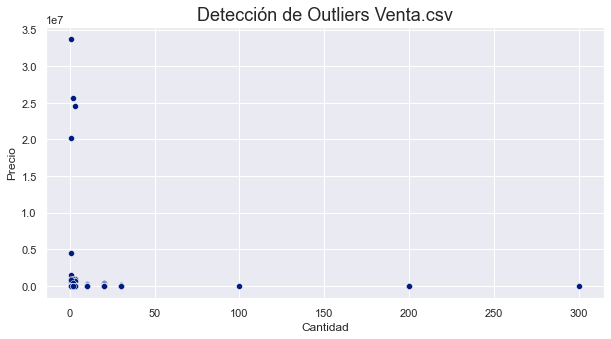

In [47]:
plt.subplots(figsize=(10,5))
sns.scatterplot(x=venta.Cantidad, y=venta.Precio)
plt.title('Detección de Outliers Venta.csv', fontsize=18)
plt.show()

##### Outliers venta_Cantidad

Dada la naturaleza de la variable, producto del comportamiento humano y su aleatoriedad, se consideran posibles los valores de compra_cantidad de 10, 20 y hasta 30 unidades. A las compras con cantidades superiores a estos valores se las considerará errores de carga y se las desestimara por ser poco frecuentes

In [48]:
outlier_cantventa = venta[venta.Cantidad>30].count()[0]
print('El porcentaje de Outliers de Cantidad es de:',round(100*outlier_cantventa/len(venta.Cantidad),2),'%')

El porcentaje de Outliers de Cantidad es de: 0.01 %


##### Outlier venta_Precio

Considerando la variabilidad inherente a los precios de los productos, se considera outlier a los precios superiores al quantil=0.95

In [49]:
outlier_precioventa = venta[(venta.Precio>venta.Precio.quantile(q=0.95))|(venta.Precio<venta.Precio.quantile(q=0.05))].count()[0]
print('El porcentaje de Outliers de Precio es de:',round(100*outlier_precioventa/len(venta.Precio),2),'%')

El porcentaje de Outliers de Precio es de: 9.46 %


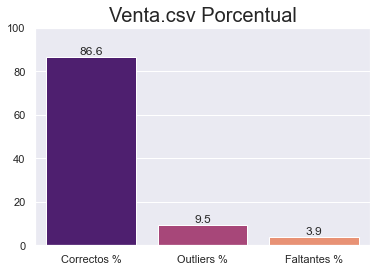

In [50]:
Outliers = outlier_cantventa + outlier_precioventa
Faltantes = venta.isna().sum().sum()
Correctos = len(venta) - Outliers - Faltantes
x = ['Correctos %','Outliers %', 'Faltantes %']
y = [100*round(Correctos/len(venta),3),100* round(Outliers/len(venta),3), 100*round(Faltantes/len(venta),3)]

ax = sns.barplot(x=x, y=y, palette='magma')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Venta.csv Porcentual', fontsize=20)
plt.ylim(top=100)
plt.show()

# DIMENTION TABLES

## Clientes.csv

Se visualiza la primer entrada de la tabla

In [51]:
cliente.head(1)

,ID,Provincia,Nombre_y_Apellido,Domicilio,Telefono,Edad,Localidad,X,Y,col10
0,1,Buenos Aires,HEBER JONI SANTANA,LAS HERAS Y BAT. 24 DE FEBRERO 4150 RINCON DE...,42-5161,58,LOMA VERDE,"-58,81850307","-34,30997088",NaN


Se elimina la columna __col10__ por no poseer ningun valor

In [52]:
cliente.drop('col10', axis=1, inplace=True)

#### Valores faltantes

In [53]:
Faltantes_cliente = cliente.isna().sum().sum()


#### Duplicados

In [54]:
cliente[cliente.ID.duplicated()]

,ID,Provincia,Nombre_y_Apellido,Domicilio,Telefono,Edad,Localidad,X,Y


Se observa que no posee ID's duplicados

#### Errores en Longitudes y Latitudes

Se sustituyen ',' por '.' para poder transformarlos a tipo float

In [55]:
cliente['Latitud'] = cliente['Y'].str.replace(",",".").astype("float")
cliente['Longitud'] = cliente['X'].str.replace(",",".").astype("float")
cliente.drop(columns='Y', inplace=True)
cliente.drop(columns='X', inplace=True)

Se calcula la cantidad de registros cargados con longitudes y latitudes positivas

In [56]:
Errores = cliente[(cliente.Latitud >0)|(cliente.Longitud>0)].count()[0]

Se plotean los correctos, errores y faltantes

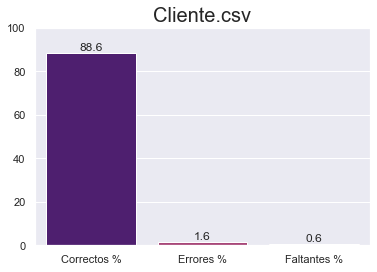

In [57]:
Correctos = len(cliente) - Errores - Faltantes_cliente
x = ['Correctos %','Errores %', 'Faltantes %']
y = [100*round(Correctos/len(cliente),3), 100*round(Errores/len(cliente),3), 100*round(Faltantes_cliente/len(venta),3)]

ax = sns.barplot(x=x, y=y, palette='magma')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Cliente.csv', fontsize=20)
plt.ylim(top=100)
plt.show()

# Sucursal.csv

In [58]:
sucursal.head(1)

,ID,Sucursal,Direccion,Localidad,Provincia,Latitud,Longitud
0,1,Cabildo,Av. Cabildo 1342,Ciudad de Buenos Aires,Ciudad de Buenos Aires,"-34,5678060","-58,4495720"


#### Valores faltantes

In [59]:
sucursal.isna().sum()

ID           0
Sucursal     0
Direccion    0
Localidad    0
Provincia    0
Latitud      0
Longitud     0
dtype: int64

#### Chequeo de duplicados

In [60]:
sucursal[sucursal.ID.duplicated()]

,ID,Sucursal,Direccion,Localidad,Provincia,Latitud,Longitud


#### Errores de Longitud y Latitud

In [61]:
sucursal['Latitud'] = sucursal['Latitud'].str.replace(",",".").astype("float")
sucursal['Longitud'] = sucursal['Longitud'].str.replace(",",".").astype("float")

In [62]:
Errores_sucursal = sucursal[(sucursal.Latitud >0)|(sucursal.Longitud>0)].count()[0]
Errores_sucursal

0

Se concluye que no hay errores ni faltantes en la tabla Sucursal.csv

# Proveedores.csv

In [63]:
proveedor.isna().sum()

ï»¿IDProveedor    0
Nombre            2
Address           0
City              0
State             0
Country           0
departamen        0
dtype: int64

#### Valores faltantes

In [64]:
Faltantes_prov = proveedor.isna().sum().sum()
Faltantes_prov

2

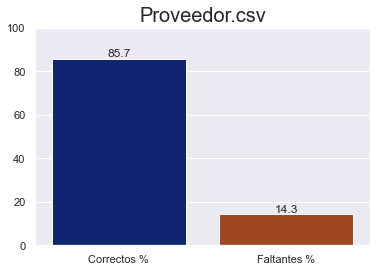

In [65]:
Correctos = len(proveedor) - Faltantes_prov

y = [100*round(Correctos/len(proveedor),3), 100*round(Faltantes_prov/len(proveedor),3)]
x = ['Correctos %', 'Faltantes %']
ax = sns.barplot(x=x, y=y, palette='dark')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Proveedor.csv', fontsize=20)
plt.ylim(top=100)
plt.show()

# KPIS

### Valores historicos de __venta__ y __compra__

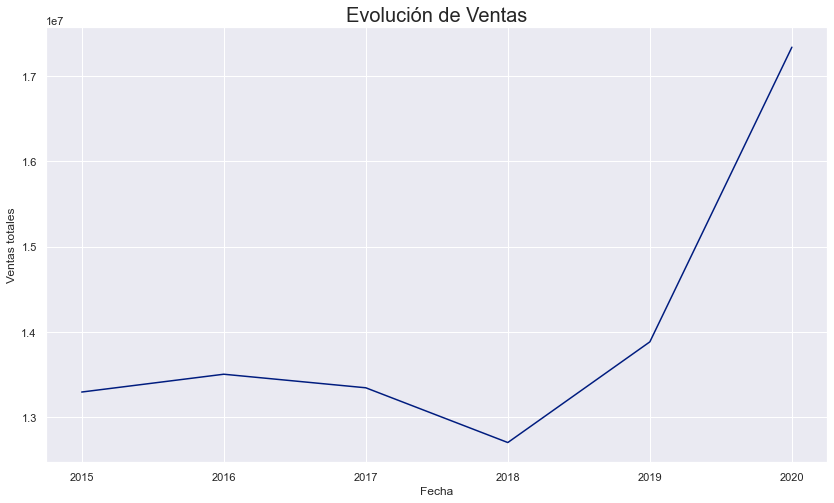

In [73]:
#Se eliminan outliers para visualizacion
venta = venta[(venta.Precio<venta.Precio.quantile(q=0.95))&(venta.Precio>venta.Precio.quantile(q=0.05))]
venta = venta[venta.Cantidad<30]

venta_calidad = venta
venta_calidad['Fecha']= pd.to_datetime(venta_calidad['Fecha'], infer_datetime_format=True)
venta_calidad['Total'] = venta_calidad['Precio']*venta_calidad['Cantidad']

plt.subplots(figsize=(14,8))
sns.lineplot(data=venta_calidad.groupby(venta_calidad.Fecha.dt.year).sum(), x='Fecha',y='Total')
plt.title('Evolución de Ventas', fontsize=20)
plt.ylabel('Ventas totales')
plt.show()

Se eliminan outliers y faltantes de compra

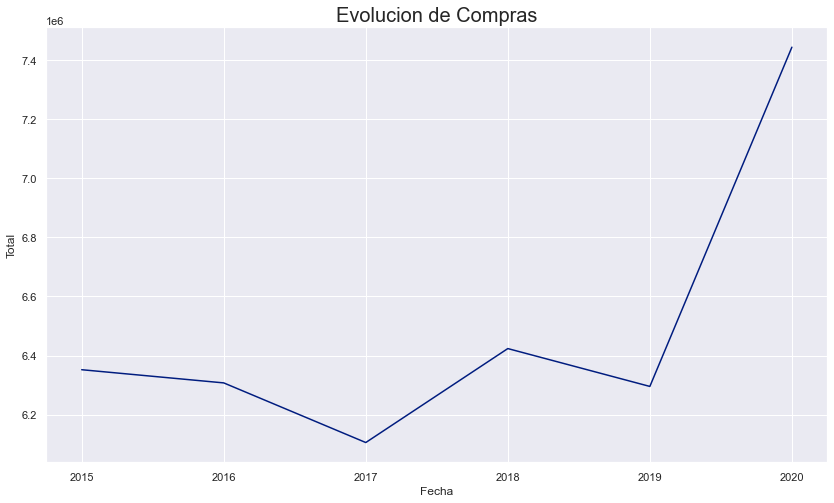

In [74]:
compra.dropna(inplace=True)
compra = compra[compra.Cantidad<30]
compra = compra[(compra.Precio>compra.Precio.quantile(0.1))&(compra.Precio<compra.Precio.quantile(0.9))]

compra['Fecha'] = pd.to_datetime(compra['Fecha'], infer_datetime_format=True)
compra['Total']= compra['Precio']*compra['Cantidad']

#Ploteo
plt.subplots(figsize=(14,8))
sns.lineplot(data= compra.groupby(compra.Fecha.dt.year).sum(), x='Fecha', y=compra.groupby(compra.Fecha.dt.year).sum()['Total'])
plt.title('Evolucion de Compras', fontsize=20)
plt.show()

Se normalizan las localidades y provincias de la tabla __Sucursal__

In [69]:
#Normalizacion de localidad
sucursal['Localidad'][sucursal['Localidad'].str.contains('Ciu')]="Buenos Aires"
sucursal['Localidad'][sucursal['Localidad'].str.contains('Cap')]="Buenos Aires"
sucursal['Localidad'][sucursal['Localidad'].str.contains('Cdad')]="Buenos Aires"
sucursal['Localidad'][sucursal['Localidad'].str.contains('CAB')]="Buenos Aires"
sucursal['Localidad'][sucursal['Localidad'].str.contains('oba')]="Cordoba"
sucursal['Localidad'][sucursal['Localidad'].str.contains('ucum')]="Tucuman"
# Normalizacion de Provincia
sucursal['Provincia'][sucursal['Provincia'].str.contains('CABA')]="Buenos Aires"
sucursal['Provincia'][sucursal['Provincia'].str.contains('Aires')]="Buenos Aires"
sucursal['Provincia'][sucursal['Provincia'].str.contains('As')]="Buenos Aires"
sucursal['Provincia'][sucursal['Provincia'].str.contains('AS')]="Buenos Aires"
sucursal['Provincia'][sucursal['Provincia'].str.contains('oba')]="Cordoba"


In [70]:
print('Provincias post arreglo:',sucursal.Provincia.unique(),'\n','Localidades post arreglo: ', sucursal.Localidad.unique())

Provincias post arreglo: ['Buenos Aires' 'Santa Fe' 'Cordoba' 'Tucumán' 'Mendoza' 'Río Negro'] 
 Localidades post arreglo:  ['Buenos Aires' 'Vicente López' 'Martínez' 'Caseros' 'Moron' 'Castelar'
 'San Justo' 'Lanus' 'Avellaneda' 'Quilmes' 'La Plata' 'Mar del Plata'
 'Rosario' 'Cordoba' 'Tucuman' 'Mendoza' 'San Carlos de Bariloche']


Se une con la tabla normalizada de ventas

In [71]:
sucursal.rename(columns={'ID':'IdSucursal'}, inplace=True)
venta_sucursal = pd.merge(venta_calidad, sucursal, how='left', on='IdSucursal' )
venta_sucursal['Total']= venta_sucursal['Precio']*venta_sucursal['Cantidad']

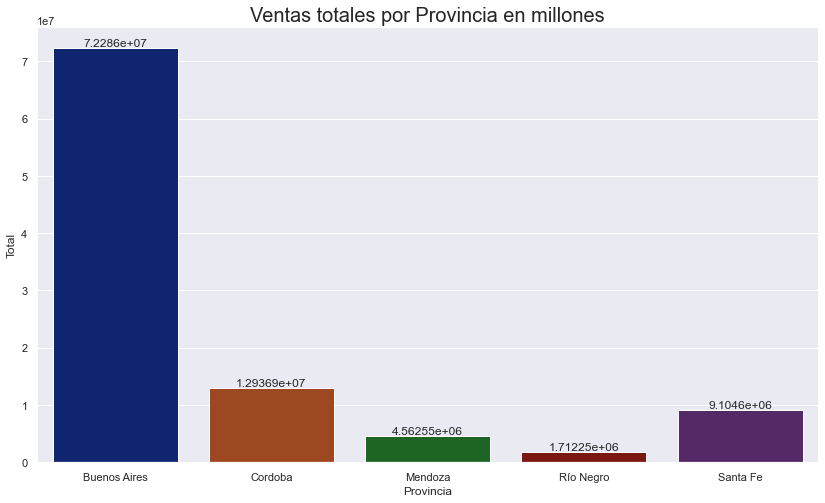

In [72]:
plt.subplots(figsize=(14,8))

df = venta_sucursal.groupby('Provincia').sum()
#df = venta_sucursal.groupby([venta_sucursal.Fecha.dt.year,'Provincia']).sum()
ax =sns.barplot(y=df.Total , x=df.index, palette='dark')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Ventas totales por Provincia en millones', fontsize=20)
plt.show()

Se sugiere abrir una nueva sucursal en la provincia de  Buenos Aires, y como KPI se podría utilizar la evolución histórica de las ventas por provincia